In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = (x_train/255.0).reshape(-1,28,28,1)
x_test = (x_test/255.0).reshape(-1,28,28,1)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [4]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.5717 - loss: 1.2424 - val_accuracy: 0.8079 - val_loss: 0.5160
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8036 - loss: 0.5407 - val_accuracy: 0.8470 - val_loss: 0.4229
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.8367 - loss: 0.4561 - val_accuracy: 0.8570 - val_loss: 0.3900
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.8549 - loss: 0.4099 - val_accuracy: 0.8690 - val_loss: 0.3598
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8671 - loss: 0.3721 - val_accuracy: 0.8764 - val_loss: 0.3389
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8715 - loss: 0.3577 - val_accuracy: 0.8823 - val_loss: 0.3239
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8779 - loss: 0.3390 - val_accuracy: 0.8875 - val_loss: 0.3167
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8816 - loss: 0.3340 - val_acc

In [6]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8879 - loss: 0.3064
Test Loss: 0.30
Test Accuracy: 0.89


In [7]:
pred_probs = model.predict(x_test)
predictions = np.argmax(pred_probs, axis=1)
actuals = np.argmax(y_test, axis=1)

for i in range(10):
    print(f"Sample {i+1}: Predicted = {predictions[i]}, Actual = {actuals[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Sample 1: Predicted = 9, Actual = 9
Sample 2: Predicted = 2, Actual = 2
Sample 3: Predicted = 1, Actual = 1
Sample 4: Predicted = 1, Actual = 1
Sample 5: Predicted = 6, Actual = 6
Sample 6: Predicted = 1, Actual = 1
Sample 7: Predicted = 4, Actual = 4
Sample 8: Predicted = 6, Actual = 6
Sample 9: Predicted = 5, Actual = 5
Sample 10: Predicted = 7, Actual = 7


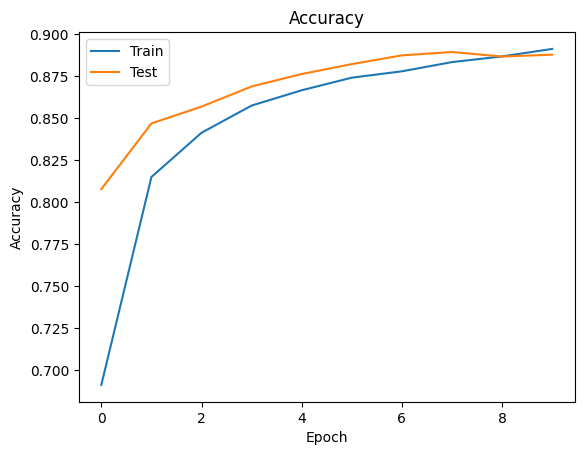

In [8]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

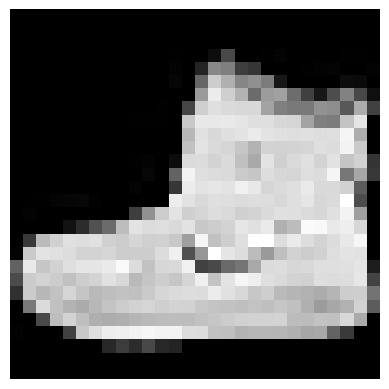

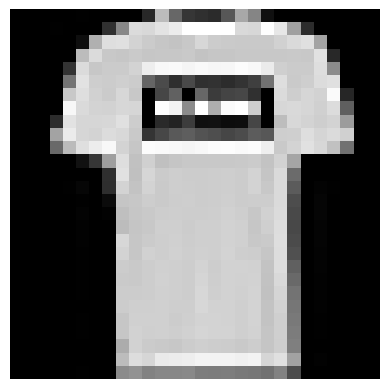

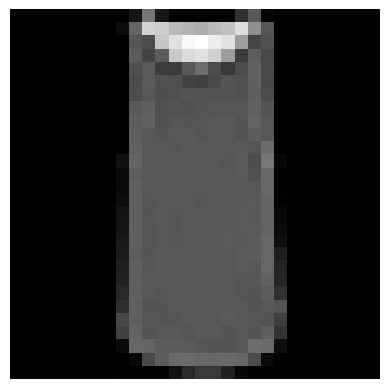

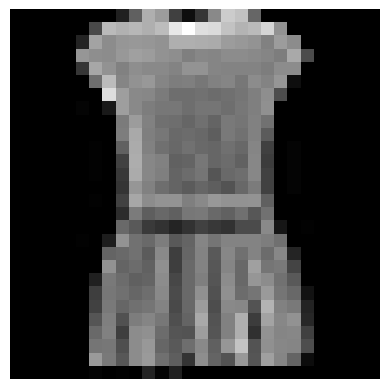

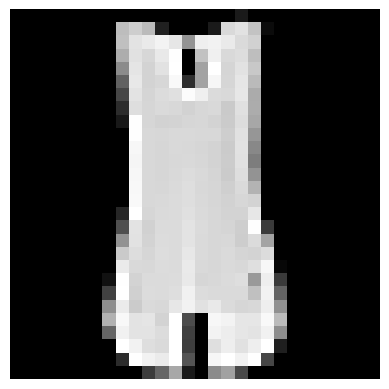

In [9]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(5):
    label_index = np.argmax(y_train[i])  # Convert one-hot to index
    print(labels[label_index])
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()